# FYP Teh Chen Ming

# Import Libraries

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar


# Load Dataset

In [118]:
df = pd.read_csv('./solar_weather.csv')

In [119]:
df.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Time                    196776 non-null  object 
 1   Energy delta[Wh]        196776 non-null  int64  
 2   GHI                     196776 non-null  float64
 3   temp                    196776 non-null  float64
 4   pressure                196776 non-null  int64  
 5   humidity                196776 non-null  int64  
 6   wind_speed              196776 non-null  float64
 7   rain_1h                 196776 non-null  float64
 8   snow_1h                 196776 non-null  float64
 9   clouds_all              196776 non-null  int64  
 10  isSun                   196776 non-null  int64  
 11  sunlightTime            196776 non-null  int64  
 12  dayLength               196776 non-null  int64  
 13  SunlightTime/daylength  196776 non-null  float64
 14  weather_type        

# Description

In [121]:
print(df.describe())

       Energy delta[Wh]            GHI           temp       pressure  \
count     196776.000000  196776.000000  196776.000000  196776.000000   
mean         573.008228      32.596538       9.790521    1015.292780   
std         1044.824047      52.172018       7.995428       9.585773   
min            0.000000       0.000000     -16.600000     977.000000   
25%            0.000000       0.000000       3.600000    1010.000000   
50%            0.000000       1.600000       9.300000    1016.000000   
75%          577.000000      46.800000      15.700000    1021.000000   
max         5020.000000     229.200000      35.800000    1047.000000   

            humidity     wind_speed        rain_1h        snow_1h  \
count  196776.000000  196776.000000  196776.000000  196776.000000   
mean       79.810566       3.937746       0.066035       0.007148   
std        15.604459       1.821694       0.278913       0.069710   
min        22.000000       0.000000       0.000000       0.000000   
25%   

In [122]:
df.isnull().sum()

Time                      0
Energy delta[Wh]          0
GHI                       0
temp                      0
pressure                  0
humidity                  0
wind_speed                0
rain_1h                   0
snow_1h                   0
clouds_all                0
isSun                     0
sunlightTime              0
dayLength                 0
SunlightTime/daylength    0
weather_type              0
hour                      0
month                     0
dtype: int64

- Our findings
1) There are **17 Columns** in dataset. Out of which 6 columns are of **float** type, 10 columns are of **integer** type, 1 is of **object** type.
2) There are **196776 Rows** in dataset.
3) As we can see the column **Time** is of object type we need to convert it in **datetime** format. 
4) There will be 0 null entries in our data set as our columns include **non-null** condition.


# Feature Selection

### We will clear some columns and calculate ourselve

In [123]:
import pandas as pd

# Select only the specified columns
keep_column = [
    'Time', 
    'Energy delta[Wh]', 
    'GHI', 
    'temp', 
    'pressure', 
    'humidity', 
    'wind_speed', 
    'rain_1h', 
    'snow_1h', 
    'clouds_all'
]

# Create a new DataFrame with only the specified columns
df = df[keep_column]

df.head()


,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100


## Clean all infinite value to Nan

In [124]:
# Convert infinite values to NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [125]:
# Convert the 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'])

# Verify the changes
print(df.info())  # To check the updated data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Time              196776 non-null  datetime64[ns]
 1   Energy delta[Wh]  196776 non-null  int64         
 2   GHI               196776 non-null  float64       
 3   temp              196776 non-null  float64       
 4   pressure          196776 non-null  int64         
 5   humidity          196776 non-null  int64         
 6   wind_speed        196776 non-null  float64       
 7   rain_1h           196776 non-null  float64       
 8   snow_1h           196776 non-null  float64       
 9   clouds_all        196776 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(4)
memory usage: 15.0 MB
None


# Initial EDA

### spliting data into normal, day/night, seasonal data to do EDA

In [126]:
# Add the 'isDayTime' column, day is 1 and night is 0
df['isDayTime'] = (df['GHI'] > 0).astype(int)

# Segment data for winter months (December, January, February)
df['Month'] = df['Time'].dt.month
winter_df = df[df['Month'].isin([12, 1, 2])]

# Drop the temporary Month column
winter_df = winter_df.drop(columns=['Month'])



### Now detecting abnormal data, noise and outlier on general column that are not affected by day and night or seasonal factor

In [127]:
# Variables to analyze
variables = ['temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'clouds_all']

In [128]:
# # Generate histograms for distributions
# for variable in variables:
#     plt.figure(figsize=(8, 5))
#     plt.hist(df[variable], bins=30, edgecolor='black', alpha=0.7)
#     plt.title(f'Histogram of {variable}')
#     plt.xlabel(variable)
#     plt.ylabel('Frequency')
#     plt.grid(True)
#     plt.show()

# # Generate boxplots to identify variability and outliers
# for variable in variables:
#     plt.figure(figsize=(8, 5))
#     plt.boxplot(df[variable], vert=False)
#     plt.title(f'Boxplot of {variable}')
#     plt.xlabel(variable)
#     plt.grid(True)
#     plt.show()

# # Generate time-series trends for selected variables
# for variable in variables:
#     plt.figure(figsize=(12, 6))
#     plt.plot(df['Time'], df[variable], alpha=0.7, linestyle='-', marker='o', markersize=1)
#     plt.title(f'Time Series of {variable}')
#     plt.xlabel('Time')
#     plt.ylabel(variable)
#     plt.xticks(rotation=45)
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()


### Nothing affect much, raining can be ignore as raining is not everyday

### Now on day/night specific data

In [129]:
# Separate data into day and night
day_data = df[df['isDayTime'] == 1]
night_data = df[df['isDayTime'] == 0]

# Variables to analyze
variables = ['GHI', 'Energy delta[Wh]']

In [130]:
# # Generate graphs for day (yellow) and night (blue)
# for variable in variables:
#     # Day histogram
#     plt.figure(figsize=(12, 5))
    
#     # Day Graph
#     plt.subplot(1, 2, 1)
#     plt.hist(day_data[variable], bins=30, color='yellow', edgecolor='black', alpha=0.7)
#     plt.title(f'{variable} Distribution - Day')
#     plt.xlabel(variable)
#     plt.ylabel('Frequency')
#     plt.grid(True)
    
#     # Night Graph
#     plt.subplot(1, 2, 2)
#     plt.hist(night_data[variable], bins=30, color='blue', edgecolor='black', alpha=0.7)
#     plt.title(f'{variable} Distribution - Night')
#     plt.xlabel(variable)
#     plt.ylabel('Frequency')
#     plt.grid(True)
    
#     plt.tight_layout()
#     plt.show()
    
#     # Boxplots
#     plt.figure(figsize=(12, 5))
    
#     # Day Boxplot
#     plt.subplot(1, 2, 1)
#     plt.boxplot(day_data[variable], vert=False, patch_artist=True,
#                 boxprops=dict(facecolor='yellow', color='black'))
#     plt.title(f'{variable} Boxplot - Day')
#     plt.xlabel(variable)
#     plt.grid(True)
    
#     # Night Boxplot
#     plt.subplot(1, 2, 2)
#     plt.boxplot(night_data[variable], vert=False, patch_artist=True,
#                 boxprops=dict(facecolor='blue', color='black'))
#     plt.title(f'{variable} Boxplot - Night')
#     plt.xlabel(variable)
#     plt.grid(True)
    
#     plt.tight_layout()
#     plt.show()

#     plt.figure(figsize=(12, 6))
#     plt.plot(df['Time'], df[variable], alpha=0.7, linestyle='-', marker='o', markersize=1)
#     plt.title(f'{variable} Time Series')
#     plt.xlabel('Time')
#     plt.ylabel(variable)
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()


    


### Outlier found in the energy delta in boxplot now we will clean it

In [131]:
# Filter rows where Energy delta[Wh] has significant values during the night
night_outliers = night_data[night_data['Energy delta[Wh]'] > 0]

night_outliers


,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isDayTime,Month
3808,2017-02-14 16:00:00,8,0.0,1.5,1037,60,1.0,0.0,0.0,0,0,2
5250,2017-03-01 16:30:00,2,0.0,6.4,999,73,2.8,0.0,0.0,79,0,3
6788,2017-03-17 17:00:00,2,0.0,5.0,1007,67,5.4,0.0,0.0,99,0,3
9960,2017-04-19 18:00:00,6,0.0,2.3,1034,65,4.3,0.0,0.0,9,0,4
10729,2017-04-27 18:15:00,5,0.0,7.9,1015,74,0.3,0.0,0.0,47,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
188621,2022-06-07 19:15:00,5,0.0,17.8,1011,77,3.3,0.0,0.0,71,0,6
191885,2022-07-11 19:15:00,5,0.0,17.9,1020,67,2.6,0.0,0.0,21,0,7
193132,2022-07-24 19:00:00,6,0.0,21.7,1018,61,1.9,0.0,0.0,96,0,7
194762,2022-08-10 18:30:00,3,0.0,22.7,1025,45,3.2,0.0,0.0,0,0,8


In [132]:
# processed_df is to prevent changes to the original dataset
processed_df = df.copy()
processed_df['Time'] = pd.to_datetime(processed_df['Time'])
processed_df = processed_df.set_index('Time')  # Set 'Time' as the index

# Replace outliers (Energy delta[Wh] > 0 during night) with 0
outlier_condition = (processed_df['isDayTime'] == 0) & (processed_df['Energy delta[Wh]'] > 0)
processed_df.loc[outlier_condition, 'Energy delta[Wh]'] = 0

# Reset the index to restore the original structure
processed_df = processed_df.reset_index()

# Display the updated dataset after treating outliers
processed_df.head()



,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isDayTime,Month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,1


In [133]:
df = processed_df.copy()
# Separate data into day and night
day_data = df[df['isDayTime'] == 1]
night_data = df[df['isDayTime'] == 0]

In [134]:
# variable = 'Energy delta[Wh]'
# # Boxplots
# plt.figure(figsize=(12, 5))

# # Day Boxplot
# plt.subplot(1, 2, 1)
# plt.boxplot(day_data[variable], vert=False, patch_artist=True,
#             boxprops=dict(facecolor='yellow', color='black'))
# plt.title(f'{variable} Boxplot - Day')
# plt.xlabel(variable)
# plt.grid(True)

# # Night Boxplot
# plt.subplot(1, 2, 2)
# plt.boxplot(night_data[variable], vert=False, patch_artist=True,
#             boxprops=dict(facecolor='blue', color='black'))
# plt.title(f'{variable} Boxplot - Night')
# plt.xlabel(variable)
# plt.grid(True)

# plt.tight_layout()
# plt.show()

### Now on snowdata

In [135]:
# # Filter the winter dataframe for snowfall analysis
# winter_snow_data = winter_df.copy()

# # Descriptive statistics for snow_1h in the winter data
# snow_stats = winter_snow_data['snow_1h'].describe()

# # Visualization
# # Histogram for snowfall distribution
# plt.figure(figsize=(8, 5))
# plt.hist(winter_snow_data['snow_1h'], bins=30, edgecolor='black', alpha=0.7)
# plt.title('Histogram of Snowfall (snow_1h) in Winter')
# plt.xlabel('Snowfall (1h)')
# plt.ylabel('Frequency')
# plt.grid(True)
# plt.show()

# # Boxplot for snowfall variability and outliers
# plt.figure(figsize=(8, 5))
# plt.boxplot(winter_snow_data['snow_1h'], vert=False)
# plt.title('Boxplot of Snowfall (snow_1h) in Winter')
# plt.xlabel('Snowfall (1h)')
# plt.grid(True)
# plt.show()

# # Time-series plot for snowfall trends
# plt.figure(figsize=(12, 6))
# plt.plot(winter_snow_data['Time'], winter_snow_data['snow_1h'], linestyle='-', marker='o', markersize=1, alpha=0.7)
# plt.title('Time Series of Snowfall (snow_1h) in Winter')
# plt.xlabel('Time')
# plt.ylabel('Snowfall (1h)')
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# snow_stats


### Snow same as rain not everyday having so also normal

### Only the day night data is preprocessed other is fine

# Feature Enginnering

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Time              196776 non-null  datetime64[ns]
 1   Energy delta[Wh]  196776 non-null  int64         
 2   GHI               196776 non-null  float64       
 3   temp              196776 non-null  float64       
 4   pressure          196776 non-null  int64         
 5   humidity          196776 non-null  int64         
 6   wind_speed        196776 non-null  float64       
 7   rain_1h           196776 non-null  float64       
 8   snow_1h           196776 non-null  float64       
 9   clouds_all        196776 non-null  int64         
 10  isDayTime         196776 non-null  int32         
 11  Month             196776 non-null  int32         
dtypes: datetime64[ns](1), float64(5), int32(2), int64(4)
memory usage: 16.5 MB


In [137]:
# Ensure the 'Time' column is in datetime format
df['Time'] = pd.to_datetime(df['Time'])

### Adding date and time feature

In [138]:
df['Year'] = df['Time'].dt.year
df['Month_num'] = df['Time'].dt.month  # Numeric month for modelling
df['DayOfYear'] = df['Time'].dt.dayofyear # Day of the year (1 to 365)

# Extract the week number
df['Week'] = df['Time'].dt.isocalendar().week

df['Minute'] = df['Time'].dt.minute
df['Hour'] = df['Time'].dt.hour

In [139]:
# Add the month name and add it as a new column
df['Month'] = df['Time'].dt.month_name()

In [140]:
df.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isDayTime,Month,Year,Month_num,DayOfYear,Week,Minute,Hour
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,January,2017,1,1,52,0,0
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,January,2017,1,1,52,15,0
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,January,2017,1,1,52,30,0
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,January,2017,1,1,52,45,0
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,January,2017,1,1,52,0,1


### Adding seasonal column

In [141]:
# Determine the season based on the month
def get_season(month):
    if month in [12, 1, 2]:  # December, January, February
        return 'Winter'
    elif month in [3, 4, 5]:  # March, April, May
        return 'Spring'
    elif month in [6, 7, 8]:  # June, July, August
        return 'Summer'
    elif month in [9, 10, 11]:  # September, October, November
        return 'Autumn'

# Apply the season function to the 'Time' column
df['Season'] = df['Month_num'].apply(get_season)

# Add the day of the week column
df['Day'] = df['Time'].dt.dayofweek.apply(lambda x: calendar.day_name[x])

# Verify the changes
print(df[['Time', 'Season', 'Month' , 'Week', 'Day', 'Hour']].head())

                 Time  Season    Month  Week     Day  Hour
0 2017-01-01 00:00:00  Winter  January    52  Sunday     0
1 2017-01-01 00:15:00  Winter  January    52  Sunday     0
2 2017-01-01 00:30:00  Winter  January    52  Sunday     0
3 2017-01-01 00:45:00  Winter  January    52  Sunday     0
4 2017-01-01 01:00:00  Winter  January    52  Sunday     1


In [142]:
df['Day']

0            Sunday
1            Sunday
2            Sunday
3            Sunday
4            Sunday
            ...    
196771    Wednesday
196772    Wednesday
196773    Wednesday
196774    Wednesday
196775    Wednesday
Name: Day, Length: 196776, dtype: object

## Data Transformation

In [143]:
# Convert week (Monday=0, ..., Sunday=6) and season (e.g., Winter=0, Spring=1, ...) to numerical values first
df['Day'] = df['Day'].map({
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 
    'Friday': 4, 'Saturday': 5, 'Sunday': 6
})

df['Season'] = df['Season'].map({
    'Spring': 0, 'Summer': 1, 'Autumn': 2, 'Winter': 3
})


In [144]:
df['Week']

0         52
1         52
2         52
3         52
4         52
          ..
196771    35
196772    35
196773    35
196774    35
196775    35
Name: Week, Length: 196776, dtype: UInt32

In [145]:
df['Season']

0         3
1         3
2         3
3         3
4         3
         ..
196771    1
196772    1
196773    1
196774    1
196775    1
Name: Season, Length: 196776, dtype: int64

In [146]:
df['Day']

0         6
1         6
2         6
3         6
4         6
         ..
196771    2
196772    2
196773    2
196774    2
196775    2
Name: Day, Length: 196776, dtype: int64

## Turning the datetime features to sin and cos to let them have the feature of cyclic

In [147]:
df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)

df['Week_sin'] = np.sin(2 * np.pi * df['Week'] / 53)
df['Week_cos'] = np.cos(2 * np.pi * df['Week'] / 53)

df['Minute_sin'] = np.sin(2 * np.pi * df['Minute'] / 60)
df['Minute_cos'] = np.cos(2 * np.pi * df['Minute'] / 60)

# Drop the original Hour column (no need still need to refer)
# df.drop(columns=['Hour'], inplace=True)

print(df.head())  # Check transformed data


                 Time  Energy delta[Wh]  GHI  temp  pressure  humidity  \
0 2017-01-01 00:00:00                 0  0.0   1.6      1021       100   
1 2017-01-01 00:15:00                 0  0.0   1.6      1021       100   
2 2017-01-01 00:30:00                 0  0.0   1.6      1021       100   
3 2017-01-01 00:45:00                 0  0.0   1.6      1021       100   
4 2017-01-01 01:00:00                 0  0.0   1.7      1020       100   

   wind_speed  rain_1h  snow_1h  clouds_all  ...  Minute Hour  Season  Day  \
0         4.9      0.0      0.0         100  ...       0    0       3    6   
1         4.9      0.0      0.0         100  ...      15    0       3    6   
2         4.9      0.0      0.0         100  ...      30    0       3    6   
3         4.9      0.0      0.0         100  ...      45    0       3    6   
4         5.2      0.0      0.0         100  ...       0    1       3    6   

   Hour_sin  Hour_cos  Week_sin  Week_cos    Minute_sin    Minute_cos  
0  0.000000  1

In [148]:
# Apply cyclical encoding
df['Weekday_sin'] = np.sin(2 * np.pi * df['Week'] / 7)
df['Weekday_cos'] = np.cos(2 * np.pi * df['Week'] / 7)

df['Season_sin'] = np.sin(2 * np.pi * df['Season'] / 4)
df['Season_cos'] = np.cos(2 * np.pi * df['Season'] / 4)


In [149]:
df['Energy_lag_1'] = df['Energy delta[Wh]'].shift(1)
df['Energy_lag_2'] = df['Energy delta[Wh]'].shift(2)

In [150]:
df.fillna(0, inplace=True)

In [151]:
df = df.select_dtypes(exclude=['object'])


In [152]:
df.drop(columns=['Time'], inplace=True)

In [153]:
df.rename(columns={'Energy delta[Wh]': 'Energy delta_Wh'}, inplace=True)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Energy delta_Wh  196776 non-null  int64  
 1   GHI              196776 non-null  float64
 2   temp             196776 non-null  float64
 3   pressure         196776 non-null  int64  
 4   humidity         196776 non-null  int64  
 5   wind_speed       196776 non-null  float64
 6   rain_1h          196776 non-null  float64
 7   snow_1h          196776 non-null  float64
 8   clouds_all       196776 non-null  int64  
 9   isDayTime        196776 non-null  int32  
 10  Year             196776 non-null  int32  
 11  Month_num        196776 non-null  int32  
 12  DayOfYear        196776 non-null  int32  
 13  Week             196776 non-null  UInt32 
 14  Minute           196776 non-null  int32  
 15  Hour             196776 non-null  int32  
 16  Season           196776 non-null  int6

In [155]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# corr_matrix = df.corr()
# plt.figure(figsize=(10,8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.show()

# Data Standarization

In [156]:
# from sklearn.preprocessing import StandardScaler

# # Select the columns to apply scaling (excluding 'Time' and categorical columns like 'isDayTime')
# columns_to_scale = ['Energy delta_Wh', 'GHI', 'temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all']

# # Create copies of the dataset
# df_standardized = df.copy()

# # Standardization
# scaler_standard = StandardScaler()
# df_standardized[columns_to_scale] = scaler_standard.fit_transform(df_standardized[columns_to_scale])

# df_standardized.head()

In [157]:
# df = df_standardized.copy()

In [158]:
# df_standardized.describe()

In [159]:
df.describe()

,Energy delta_Wh,GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isDayTime,...,Week_sin,Week_cos,Minute_sin,Minute_cos,Weekday_sin,Weekday_cos,Season_sin,Season_cos,Energy_lag_1,Energy_lag_2
count,196776.00000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,...,196776.0,196776.0,1.967760e+05,1.967760e+05,196776.0,196776.0,196776.000000,1.967760e+05,196776.00000,196776.000000
mean,573.00310,32.596538,9.790521,1015.292780,79.810566,3.937746,0.066035,0.007148,65.974387,0.516994,...,0.044397,-0.04602,1.387858e-16,3.610922e-20,0.032125,-0.015868,0.027686,4.829857e-02,573.00310,573.002978
std,1044.82681,52.172018,7.995428,9.585773,15.604459,1.821694,0.278913,0.069710,36.628593,0.499712,...,0.708117,0.703197,7.071086e-01,7.071086e-01,0.709968,0.703326,0.713395,6.985509e-01,1044.82681,1044.826875
min,0.00000,0.000000,-16.600000,977.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.999561,-0.998244,-1.000000e+00,-1.000000e+00,-0.974928,-0.900969,-1.000000,-1.000000e+00,0.00000,0.000000
25%,0.00000,0.000000,3.600000,1010.000000,70.000000,2.600000,0.000000,0.000000,34.000000,0.000000,...,-0.652822,-0.717507,-2.500000e-01,-2.500000e-01,-0.781831,-0.900969,0.000000,-1.836970e-16,0.00000,0.000000
50%,0.00000,1.600000,9.300000,1016.000000,84.000000,3.700000,0.000000,0.000000,82.000000,1.000000,...,0.118273,-0.088796,2.832769e-16,4.978996e-17,-0.0,-0.222521,0.000000,6.123234e-17,0.00000,0.000000
75%,577.00000,46.800000,15.700000,1021.000000,92.000000,5.000000,0.000000,0.000000,100.000000,1.000000,...,0.737833,0.674983,2.500000e-01,2.500000e-01,0.781831,0.62349,1.000000,1.000000e+00,577.00000,577.000000
max,5020.00000,229.200000,35.800000,1047.000000,100.000000,14.300000,8.090000,2.820000,100.000000,1.000000,...,0.999561,1.0,1.000000e+00,1.000000e+00,0.974928,1.0,1.000000,1.000000e+00,5020.00000,5020.000000


# Data Normalization

In [160]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numeric_cols = ['Energy delta_Wh', 'GHI', 'temp', 'pressure', 'humidity', 
                'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df


,Energy delta_Wh,GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isDayTime,...,Week_sin,Week_cos,Minute_sin,Minute_cos,Weekday_sin,Weekday_cos,Season_sin,Season_cos,Energy_lag_1,Energy_lag_2
0,0.000000,0.000000,0.347328,0.628571,1.000000,0.342657,0.0,0.0,1.00,0,...,-0.118273,0.992981,0.000000e+00,1.000000e+00,0.433884,-0.900969,-1.0,-1.836970e-16,0.0,0.0
1,0.000000,0.000000,0.347328,0.628571,1.000000,0.342657,0.0,0.0,1.00,0,...,-0.118273,0.992981,1.000000e+00,2.832769e-16,0.433884,-0.900969,-1.0,-1.836970e-16,0.0,0.0
2,0.000000,0.000000,0.347328,0.628571,1.000000,0.342657,0.0,0.0,1.00,0,...,-0.118273,0.992981,5.665539e-16,-1.000000e+00,0.433884,-0.900969,-1.0,-1.836970e-16,0.0,0.0
3,0.000000,0.000000,0.347328,0.628571,1.000000,0.342657,0.0,0.0,1.00,0,...,-0.118273,0.992981,-1.000000e+00,-1.836970e-16,0.433884,-0.900969,-1.0,-1.836970e-16,0.0,0.0
4,0.000000,0.000000,0.349237,0.614286,1.000000,0.363636,0.0,0.0,1.00,0,...,-0.118273,0.992981,0.000000e+00,1.000000e+00,0.433884,-0.900969,-1.0,-1.836970e-16,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196771,0.023506,0.103403,0.671756,0.657143,0.448718,0.265734,0.0,0.0,0.52,1,...,-0.845596,-0.533823,-1.000000e+00,-1.836970e-16,-0.0,1.0,1.0,6.123234e-17,157.0,329.0
196772,0.016335,0.068063,0.669847,0.657143,0.500000,0.293706,0.0,0.0,0.60,1,...,-0.845596,-0.533823,0.000000e+00,1.000000e+00,-0.0,1.0,1.0,6.123234e-17,118.0,157.0
196773,0.010159,0.034904,0.669847,0.657143,0.500000,0.293706,0.0,0.0,0.60,1,...,-0.845596,-0.533823,1.000000e+00,2.832769e-16,-0.0,1.0,1.0,6.123234e-17,82.0,118.0
196774,0.004781,0.009162,0.669847,0.657143,0.500000,0.293706,0.0,0.0,0.60,1,...,-0.845596,-0.533823,5.665539e-16,-1.000000e+00,-0.0,1.0,1.0,6.123234e-17,51.0,82.0


In [161]:
df.describe()

,Energy delta_Wh,GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isDayTime,...,Week_sin,Week_cos,Minute_sin,Minute_cos,Weekday_sin,Weekday_cos,Season_sin,Season_cos,Energy_lag_1,Energy_lag_2
count,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,...,196776.0,196776.0,1.967760e+05,1.967760e+05,196776.0,196776.0,196776.000000,1.967760e+05,196776.00000,196776.000000
mean,0.114144,0.142219,0.503636,0.547040,0.741161,0.275367,0.008163,0.002535,0.659744,0.516994,...,0.044397,-0.04602,1.387858e-16,3.610922e-20,0.032125,-0.015868,0.027686,4.829857e-02,573.00310,573.002978
std,0.208133,0.227627,0.152585,0.136940,0.200057,0.127391,0.034476,0.024720,0.366286,0.499712,...,0.708117,0.703197,7.071086e-01,7.071086e-01,0.709968,0.703326,0.713395,6.985509e-01,1044.82681,1044.826875
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.999561,-0.998244,-1.000000e+00,-1.000000e+00,-0.974928,-0.900969,-1.000000,-1.000000e+00,0.00000,0.000000
25%,0.000000,0.000000,0.385496,0.471429,0.615385,0.181818,0.000000,0.000000,0.340000,0.000000,...,-0.652822,-0.717507,-2.500000e-01,-2.500000e-01,-0.781831,-0.900969,0.000000,-1.836970e-16,0.00000,0.000000
50%,0.000000,0.006981,0.494275,0.557143,0.794872,0.258741,0.000000,0.000000,0.820000,1.000000,...,0.118273,-0.088796,2.832769e-16,4.978996e-17,-0.0,-0.222521,0.000000,6.123234e-17,0.00000,0.000000
75%,0.114940,0.204188,0.616412,0.628571,0.897436,0.349650,0.000000,0.000000,1.000000,1.000000,...,0.737833,0.674983,2.500000e-01,2.500000e-01,0.781831,0.62349,1.000000,1.000000e+00,577.00000,577.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.999561,1.0,1.000000e+00,1.000000e+00,0.974928,1.0,1.000000,1.000000e+00,5020.00000,5020.000000


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Energy delta_Wh  196776 non-null  float64
 1   GHI              196776 non-null  float64
 2   temp             196776 non-null  float64
 3   pressure         196776 non-null  float64
 4   humidity         196776 non-null  float64
 5   wind_speed       196776 non-null  float64
 6   rain_1h          196776 non-null  float64
 7   snow_1h          196776 non-null  float64
 8   clouds_all       196776 non-null  float64
 9   isDayTime        196776 non-null  int32  
 10  Year             196776 non-null  int32  
 11  Month_num        196776 non-null  int32  
 12  DayOfYear        196776 non-null  int32  
 13  Week             196776 non-null  UInt32 
 14  Minute           196776 non-null  int32  
 15  Hour             196776 non-null  int32  
 16  Season           196776 non-null  int6

## Check Feature Importance (Permutation)

In [163]:
# Define X (features) and y (target)
FEATURES = [col for col in df.columns if col != 'Energy delta_Wh']
X = df[FEATURES]
y = df['Energy delta_Wh']

         Feature  Importance
27  Energy_lag_1    0.689551
0            GHI    0.356682
20      Week_cos    0.019397
14          Hour    0.016039
28  Energy_lag_2    0.011318
11     DayOfYear    0.002998
7     clouds_all    0.002264
1           temp    0.001541
9           Year    0.001472
4     wind_speed    0.001140
3       humidity    0.000894
5        rain_1h    0.000833
13        Minute    0.000745
2       pressure    0.000705
18      Hour_cos    0.000602
15        Season    0.000317
19      Week_sin    0.000261
17      Hour_sin    0.000243
25    Season_sin    0.000156
16           Day    0.000118
21    Minute_sin    0.000118
12          Week    0.000102
10     Month_num    0.000088
23   Weekday_sin    0.000063
24   Weekday_cos    0.000049
22    Minute_cos    0.000046
6        snow_1h    0.000002
8      isDayTime    0.000000
26    Season_cos    0.000000


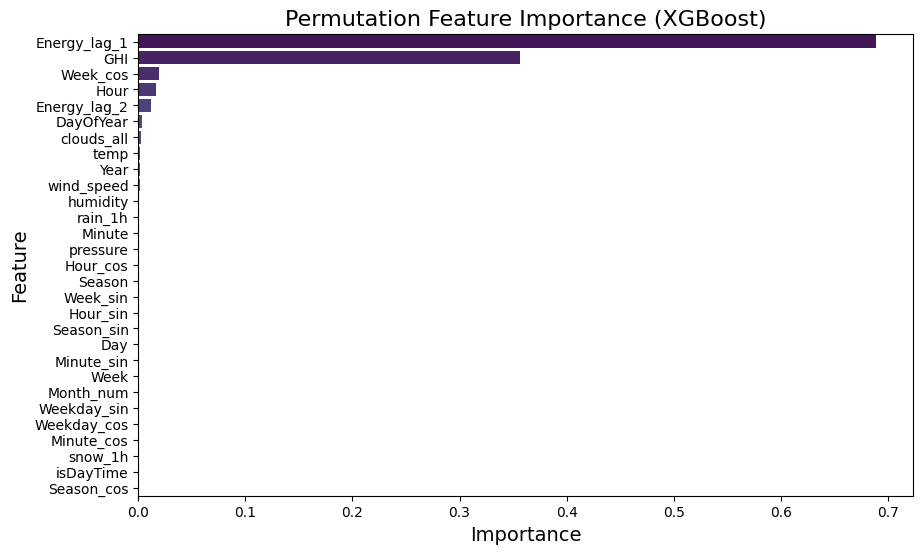

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.inspection import permutation_importance

# 1️ Train the XGBoost Model
model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)
model.fit(X, y)

# 2️ Compute Permutation Feature Importance
perm_importance = permutation_importance(model, X, y, n_repeats=10, random_state=42)

# 3️ Convert Results to DataFrame
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": perm_importance.importances_mean
}).sort_values(by="Importance", ascending=False)

# 4️ Display Important Features
print(feature_importance)

# 5 Visualize Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")
plt.title("Permutation Feature Importance (XGBoost)", fontsize=16)
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.show()


In [165]:
X = X.astype('float64')


## Check Feature Importance (SHAP)

SHAP Feature Importance:
         Feature  Importance
27  Energy_lag_1    0.115581
0            GHI    0.035531
14          Hour    0.007313
20      Week_cos    0.006043
28  Energy_lag_2    0.002563
7     clouds_all    0.002246
11     DayOfYear    0.001994
9           Year    0.000944
1           temp    0.000698
13        Minute    0.000664
17      Hour_sin    0.000629
15        Season    0.000603
18      Hour_cos    0.000583
4     wind_speed    0.000482
3       humidity    0.000467
2       pressure    0.000455
19      Week_sin    0.000383
10     Month_num    0.000354
12          Week    0.000189
25    Season_sin    0.000139
5        rain_1h    0.000131
21    Minute_sin    0.000111
24   Weekday_cos    0.000070
23   Weekday_sin    0.000067
16           Day    0.000060
22    Minute_cos    0.000020
6        snow_1h    0.000004
8      isDayTime    0.000000
26    Season_cos    0.000000


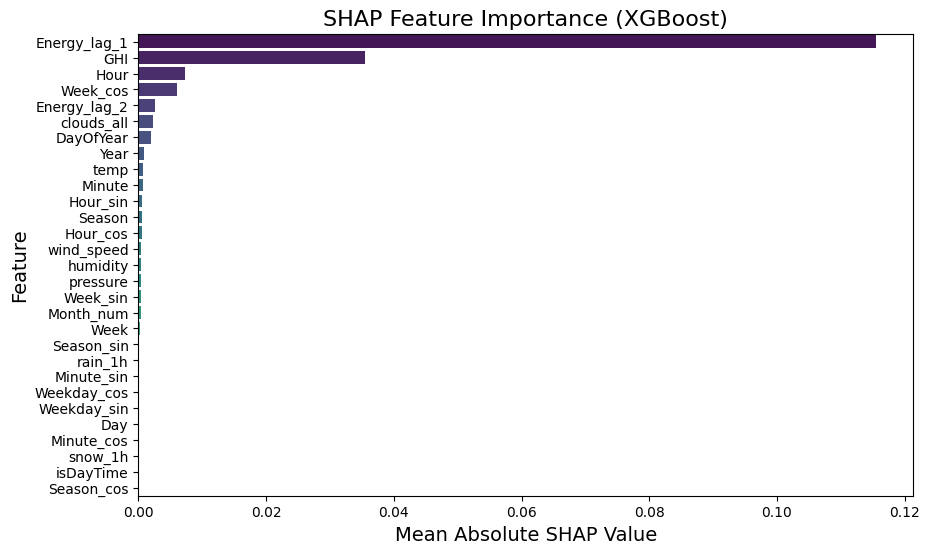

In [166]:
import shap
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Fit the XGBoost Model
model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)
model.fit(X, y)  # Ensure this step runs before using SHAP

# 2. Create SHAP Tree Explainer
explainer = shap.TreeExplainer(model)

# 3. Compute SHAP values for the dataset
shap_values = explainer.shap_values(X)

# 4. Summarize SHAP Importance
shap_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": np.mean(np.abs(shap_values), axis=0)
}).sort_values(by="Importance", ascending=False)

# 5. Display SHAP Feature Importance
print("SHAP Feature Importance:")
print(shap_importance_df)

# 6. Visualize SHAP Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=shap_importance_df, palette="viridis")
plt.title("SHAP Feature Importance (XGBoost)", fontsize=16)
plt.xlabel("Mean Absolute SHAP Value", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.show()


### Feature Selection

In [167]:
df.head(5)

,Energy delta_Wh,GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isDayTime,...,Week_sin,Week_cos,Minute_sin,Minute_cos,Weekday_sin,Weekday_cos,Season_sin,Season_cos,Energy_lag_1,Energy_lag_2
0,0.0,0.0,0.347328,0.628571,1.0,0.342657,0.0,0.0,1.0,0,...,-0.118273,0.992981,0.000000e+00,1.000000e+00,0.433884,-0.900969,-1.0,-1.836970e-16,0.0,0.0
1,0.0,0.0,0.347328,0.628571,1.0,0.342657,0.0,0.0,1.0,0,...,-0.118273,0.992981,1.000000e+00,2.832769e-16,0.433884,-0.900969,-1.0,-1.836970e-16,0.0,0.0
2,0.0,0.0,0.347328,0.628571,1.0,0.342657,0.0,0.0,1.0,0,...,-0.118273,0.992981,5.665539e-16,-1.000000e+00,0.433884,-0.900969,-1.0,-1.836970e-16,0.0,0.0
3,0.0,0.0,0.347328,0.628571,1.0,0.342657,0.0,0.0,1.0,0,...,-0.118273,0.992981,-1.000000e+00,-1.836970e-16,0.433884,-0.900969,-1.0,-1.836970e-16,0.0,0.0
4,0.0,0.0,0.349237,0.614286,1.0,0.363636,0.0,0.0,1.0,0,...,-0.118273,0.992981,0.000000e+00,1.000000e+00,0.433884,-0.900969,-1.0,-1.836970e-16,0.0,0.0


### Feature Reduction

In [168]:
columns_to_drop = [
    "Hour_sin", "Hour_cos", "Week_sin", "Season_cos", "Minute_sin", "Minute_cos",
    "snow_1h", "isDayTime", "Weekday_sin", "Weekday_cos", "Week"
]

df.drop(columns=columns_to_drop, inplace=True)

# To CSV

In [169]:
df.to_csv('solar_weather_processed.csv', index=False)

## 4.4 Data Understanding

### 4.4.1 Variables

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Energy delta_Wh  196776 non-null  float64
 1   GHI              196776 non-null  float64
 2   temp             196776 non-null  float64
 3   pressure         196776 non-null  float64
 4   humidity         196776 non-null  float64
 5   wind_speed       196776 non-null  float64
 6   rain_1h          196776 non-null  float64
 7   clouds_all       196776 non-null  float64
 8   Year             196776 non-null  int32  
 9   Month_num        196776 non-null  int32  
 10  DayOfYear        196776 non-null  int32  
 11  Minute           196776 non-null  int32  
 12  Hour             196776 non-null  int32  
 13  Season           196776 non-null  int64  
 14  Day              196776 non-null  int64  
 15  Week_cos         196776 non-null  Float64
 16  Season_sin       196776 non-null  floa

In [189]:
df.head(5)

,Energy delta_Wh,GHI,temp,pressure,humidity,wind_speed,rain_1h,clouds_all,Year,Month_num,DayOfYear,Minute,Hour,Season,Day,Week_cos,Season_sin,Energy_lag_1,Energy_lag_2
0,0.0,0.0,0.347328,0.628571,1.0,0.342657,0.0,1.0,2017,1,1,0,0,3,6,0.992981,-1.0,0.0,0.0
1,0.0,0.0,0.347328,0.628571,1.0,0.342657,0.0,1.0,2017,1,1,15,0,3,6,0.992981,-1.0,0.0,0.0
2,0.0,0.0,0.347328,0.628571,1.0,0.342657,0.0,1.0,2017,1,1,30,0,3,6,0.992981,-1.0,0.0,0.0
3,0.0,0.0,0.347328,0.628571,1.0,0.342657,0.0,1.0,2017,1,1,45,0,3,6,0.992981,-1.0,0.0,0.0
4,0.0,0.0,0.349237,0.614286,1.0,0.363636,0.0,1.0,2017,1,1,0,1,3,6,0.992981,-1.0,0.0,0.0


In [190]:
df.describe()

,Energy delta_Wh,GHI,temp,pressure,humidity,wind_speed,rain_1h,clouds_all,Year,Month_num,DayOfYear,Minute,Hour,Season,Day,Week_cos,Season_sin,Energy_lag_1,Energy_lag_2
count,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.0,196776.000000,196776.00000,196776.000000
mean,0.114144,0.142219,0.503636,0.547040,0.741161,0.275367,0.008163,0.659744,2019.345042,6.298329,176.222100,22.500000,11.498902,1.433711,2.992804,-0.04602,0.027686,573.00310,573.002978
std,0.208133,0.227627,0.152585,0.136940,0.200057,0.127391,0.034476,0.366286,1.636537,3.376066,103.218601,16.770552,6.921887,1.125266,2.001181,0.703197,0.713395,1044.82681,1044.826875
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.998244,-1.000000,0.00000,0.000000
25%,0.000000,0.000000,0.385496,0.471429,0.615385,0.181818,0.000000,0.340000,2018.000000,3.000000,88.000000,11.250000,5.000000,0.000000,1.000000,-0.717507,0.000000,0.00000,0.000000
50%,0.000000,0.006981,0.494275,0.557143,0.794872,0.258741,0.000000,0.820000,2019.000000,6.000000,173.000000,22.500000,11.000000,1.000000,3.000000,-0.088796,0.000000,0.00000,0.000000
75%,0.114940,0.204188,0.616412,0.628571,0.897436,0.349650,0.000000,1.000000,2021.000000,9.000000,262.000000,33.750000,17.000000,2.000000,5.000000,0.674983,1.000000,577.00000,577.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2022.000000,12.000000,366.000000,45.000000,23.000000,3.000000,6.000000,1.0,1.000000,5020.00000,5020.000000


### 4.4.2 Observation

### 4.4.3 Histrogram

### 4.4.4 Line chart

# Finding Relations

In [172]:
# df.head()

In [173]:
# df.info()

In [174]:
# # Numerical columns in the dataset
# numerical_columns = [
#     'Energy delta[Wh]', 'GHI', 'temp', 'pressure', 
#     'humidity', 'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'isDayTime'
# ]

# # Assuming processed_df is the DataFrame from the user's dataset
# # Calculate the correlation matrix for numerical columns
# correlation_matrix = df[numerical_columns].corr()


# # Improved heatmap to show all values in boxes
# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, annot_kws={"size": 8})
# plt.title('Correlation Heatmap with All Values Annotated')
# plt.tight_layout()
# plt.show()


In [175]:
# # Generate KDE plots for all specified variables against Energy delta[Wh]

# # Variables to compare with Energy delta[Wh]
# variables_to_compare = ['GHI', 'temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all']

# for variable in variables_to_compare:
#     plt.figure(figsize=(8, 6))
#     # KDE plot for better visualization of relationships
#     sns.kdeplot(data=processed_df, x=variable, y='Energy delta[Wh]', cmap='Blues', fill=True)
#     corr_value = processed_df[variable].corr(processed_df['Energy delta[Wh]'])
#     plt.title(f'KDE Plot of {variable} vs Energy delta[Wh] (Correlation = {corr_value:.2f})')
#     plt.xlabel(variable)
#     plt.ylabel('Energy delta[Wh]')
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()


# GHI

In [176]:
# figure, ax = plt.subplots(2,1,figsize = (20,10))
# plt.subplots_adjust(hspace=0.5)
# sns.lineplot(x=df['Hour'].unique(), y=df.groupby('Hour').mean()['Energy delta[Wh]'], ax = ax[0])
# ax[0].tick_params('x', labelrotation=75)
# sns.lineplot(x=df['Hour'].unique(), y=df.groupby('Hour').mean()['GHI'], ax = ax[1])
# ax[1].tick_params('x', labelrotation=75)
# figure.suptitle('Relation Between GHI and Energy Delta over Time(Hour) ', fontsize=25)
# ax[0].title.set_text('Line Plot Represent the Average Energy delta for Each Hour')
# ax[1].title.set_text('Line Plot Represent the Average GHI Over for Each Hour')
# plt.show()

In [177]:
# figure, ax = plt.subplots(2,1,figsize = (20,10))
# plt.subplots_adjust(hspace=0.5)
# sns.lineplot(x=df['month'].unique(), y=df.groupby('month').mean()['Energy delta[Wh]'], ax = ax[0])
# ax[0].tick_params('x', labelrotation=75)
# sns.lineplot(x=df['month'].unique(), y=df.groupby('month').mean()['GHI'], ax = ax[1])
# ax[1].tick_params('x', labelrotation=75)
# figure.suptitle('Relation Between Average of GHI and Energy Delta for each month ', fontsize=25)
# ax[0].title.set_text('Line Plot Represent the Average Energy delta for each month')
# ax[1].title.set_text('Line Plot Represent the Average GHI for each month')
# plt.show()

# SNOW

In [178]:
# figure, ax = plt.subplots(3,1,figsize = (20,10))
# plt.subplots_adjust(hspace=0.5)
# sns.lineplot(x=df['Hour'].unique(), y=df.groupby('Hour').mean()['snow_1h'], ax = ax[0])
# ax[0].tick_params('x', labelrotation=75)
# sns.lineplot(x=df['Hour'].unique(), y=df.groupby('Hour').mean()['GHI'], ax = ax[1])
# ax[1].tick_params('x', labelrotation=75)
# sns.lineplot(x=df['Hour'].unique(), y=df.groupby('Hour').mean()['Energy delta[Wh]'], ax = ax[2])
# ax[2].tick_params('x', labelrotation=75)
# figure.suptitle('Relation Between Average of GHI and Energy Delta Snow Fall for Each Hour ', fontsize=25)
# ax[0].title.set_text('Line Plot Represent the Average Snow Fall for Each Hour')
# ax[1].title.set_text('Line Plot Represent the Average GHI for Each Hour')
# ax[2].title.set_text('Line Plot Represent the Average Energy delta for Each Hour')
# plt.show()

In [179]:
# figure, ax = plt.subplots(3,1,figsize = (20,10))
# plt.subplots_adjust(hspace=0.5)
# sns.lineplot(x=df['month'].unique(), y=df.groupby('month').mean()['snow_1h'], ax = ax[0])
# ax[0].tick_params('x', labelrotation=75)
# sns.lineplot(x=df['month'].unique(), y=df.groupby('month').mean()['GHI'], ax = ax[1])
# ax[1].tick_params('x', labelrotation=75)
# sns.lineplot(x=df['month'].unique(), y=df.groupby('month').mean()['Energy delta[Wh]'], ax = ax[2])
# ax[2].tick_params('x', labelrotation=75)
# figure.suptitle('Relation Between Average of GHI and Energy Delta Snow Fall for Each Month ', fontsize=25)
# ax[0].title.set_text('Line Plot Represent the Average Snow Fall for Each Month')
# ax[1].title.set_text('Line Plot Represent the Average GHI for Each Month')
# ax[2].title.set_text('Line Plot Represent the Average Energy delta for Each Month')
# plt.show()

# Cloud

In [180]:
# figure, ax = plt.subplots(3,1,figsize = (20,10))
# plt.subplots_adjust(hspace=0.5)
# sns.lineplot(x=df['Hour'].unique(), y=df.groupby('Hour').mean()['clouds_all'], ax = ax[0])
# ax[0].tick_params('x', labelrotation=75)
# sns.lineplot(x=df['Hour'].unique(), y=df.groupby('Hour').mean()['GHI'], ax = ax[1])
# ax[1].tick_params('x', labelrotation=75)
# sns.lineplot(x=df['Hour'].unique(), y=df.groupby('Hour').mean()['Energy delta[Wh]'], ax = ax[2])
# ax[2].tick_params('x', labelrotation=75)
# figure.suptitle('Relation Between Average of GHI, Energy Delta and Cloud Cover for Each Hour ', fontsize=25)
# ax[0].title.set_text('Line Plot Represent the Average Cloud Cover For Each Hour')
# ax[1].title.set_text('Line Plot Represent the Average GHI For Each Hour')
# ax[2].title.set_text('Line Plot Represent the Average Energy delta For Each Hour')
# plt.show()

In [181]:
# figure, ax = plt.subplots(3,1,figsize = (20,10))
# plt.subplots_adjust(hspace=0.5)
# sns.lineplot(x=df['month'].unique(), y=df.groupby('month').mean()['clouds_all'], ax = ax[0])
# ax[0].tick_params('x', labelrotation=75)
# sns.lineplot(x=df['month'].unique(), y=df.groupby('month').mean()['GHI'], ax = ax[1])
# ax[1].tick_params('x', labelrotation=75)
# sns.lineplot(x=df['month'].unique(), y=df.groupby('month').mean()['Energy delta[Wh]'], ax = ax[2])
# ax[2].tick_params('x', labelrotation=75)
# figure.suptitle('Relation Between Average of GHI, Energy Delta and Cloud Cover for Each Month ', fontsize=25)
# ax[0].title.set_text('Line Plot Represent the Average Cloud Cover For Each Month')
# ax[1].title.set_text('Line Plot Represent the Average GHI For Each Month')
# ax[2].title.set_text('Line Plot Represent the Average Energy delta For Each Month')
# plt.show()

# Wind Energy

In [182]:
# figure, ax = plt.subplots(2,1,figsize = (20,10))
# plt.subplots_adjust(hspace=0.5)
# sns.lineplot(x=df['Hour'].unique(), y=df.groupby('Hour').mean()['wind_speed'], ax = ax[0])
# ax[0].tick_params('x', labelrotation=75)
# sns.lineplot(x=df['Hour'].unique(), y=df.groupby('Hour').mean()['Energy delta[Wh]'], ax = ax[1])
# ax[1].tick_params('x', labelrotation=75)
# figure.suptitle('Relation Between Average of Wind Speed and Energy Delta for Each Hour ', fontsize=25)
# ax[0].title.set_text('Line Plot Represent the Average Wind Speed for Each Hour')
# ax[1].title.set_text('Line Plot Represent the Average Energy Delta for Each Hour')
# plt.show()

In [183]:
# figure, ax = plt.subplots(2,1,figsize = (20,10))
# plt.subplots_adjust(hspace=0.5)
# sns.lineplot(x=df['month'].unique(), y=df.groupby('month').mean()['wind_speed'], ax = ax[0])
# ax[0].tick_params('x', labelrotation=75)
# sns.lineplot(x=df['month'].unique(), y=df.groupby('month').mean()['Energy delta[Wh]'], ax = ax[1])
# ax[1].tick_params('x', labelrotation=75)
# figure.suptitle('Relation Between Average of Wind Speed and Energy Delta for Each Month ', fontsize=25)
# ax[0].title.set_text('Line Plot Represent the Average Wind Speed for Each Month')
# ax[1].title.set_text('Line Plot Represent the Average Energy Delta for Each Month')
# plt.show()

In [184]:
# df.info()

# Humidity

In [185]:

# # Plot line graphs for hourly trends
# fig, ax = plt.subplots(2, 1, figsize=(20, 10))
# plt.subplots_adjust(hspace=0.5)

# # Line plot for average humidity by hour
# sns.lineplot(x=df['Hour'].unique(), 
#              y=df.groupby('Hour')['humidity'].mean(), ax=ax[0])
# ax[0].tick_params('x', labelrotation=75)
# ax[0].title.set_text('Line Plot Representing the Average Humidity for Each Hour')

# # Line plot for average Energy delta[Wh] by hour
# sns.lineplot(x=df['Hour'].unique(), 
#              y=df.groupby('Hour')['Energy delta[Wh]'].mean(), ax=ax[1])
# ax[1].tick_params('x', labelrotation=75)
# ax[1].title.set_text('Line Plot Representing the Average Energy Delta for Each Hour')

# # Overall title
# fig.suptitle('Relation Between Average Humidity and Energy Delta for Each Hour', fontsize=25)

# plt.show()


In [186]:
# # Generate line plots for monthly averages of humidity and Energy delta[Wh]

# fig, ax = plt.subplots(2, 1, figsize=(20, 10))
# plt.subplots_adjust(hspace=0.5)

# # Line plot for average humidity by month
# sns.lineplot(x=processed_df['Month'].unique(), 
#              y=processed_df.groupby('Month').mean()['humidity'], ax=ax[0])
# ax[0].tick_params('x', labelrotation=75)
# ax[0].title.set_text('Line Plot Representing the Average Humidity for Each Month')

# # Line plot for average Energy delta[Wh] by month
# sns.lineplot(x=processed_df['Month'].unique(), 
#              y=processed_df.groupby('Month').mean()['Energy delta[Wh]'], ax=ax[1])
# ax[1].tick_params('x', labelrotation=75)
# ax[1].title.set_text('Line Plot Representing the Average Energy Delta for Each Month')

# # Overall title for the plots
# fig.suptitle('Relation Between Average Humidity and Energy Delta for Each Month', fontsize=25)

# plt.show()
